In [1]:
#all imports go here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
import random
import scipy
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pingouin as pg
from numpy import array
from matplotlib import pyplot

In [2]:
dataset=df=pd.read_csv("/Users/lilong/Desktop/diabetes.csv")

In [3]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [4]:
dataset.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [5]:
#The dataset has 0 for Glucose, Blood Pressure, Skin Thickness, Insulin and BMI. None of these values can be zero
#Assume that the unusual value is due to missing data
#Replace them with the median value in the column.
df['Glucose'] = df['Glucose'].replace({0: df['Glucose'].median()})
df['BloodPressure'] = df['BloodPressure'].replace({0: df['BloodPressure'].median()})
df['SkinThickness'] = df['SkinThickness'].replace({0: df['SkinThickness'].median()})
df['Insulin'] = df['Insulin'].replace({0: df['Insulin'].median()})
df['BMI'] = df['BMI'].replace({0: df['BMI'].median()})

<AxesSubplot:>

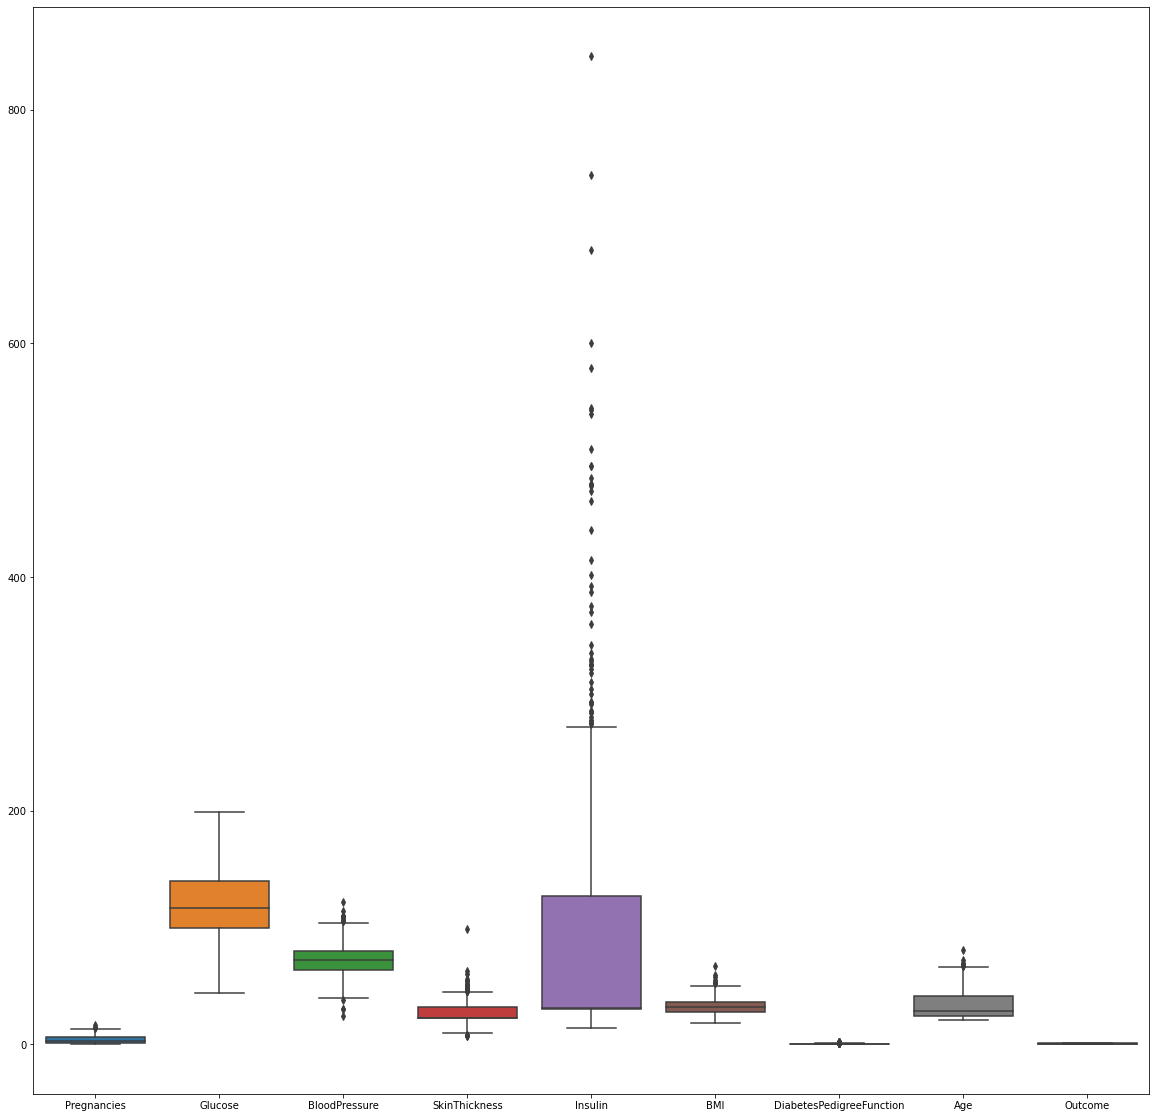

In [6]:
fig , ax = plt.subplots(figsize = (20,20))
sns.boxplot(data = df, ax = ax)

In [7]:
#Use 75% as the quantile range. Any points outside of 75% consider as outliers
q= df['Insulin'].quantile(0.75) 

In [8]:
#Clean all outliers and creat new data frame
df_new = df[df['Insulin'] < q]

In [9]:
#Display without outliers
#Losing 192 rows of data(about 25%)
df_new

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0     30.5  33.6   
1              1     85.0           66.0           29.0     30.5  26.6   
2              8    183.0           64.0           23.0     30.5  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
5              5    116.0           74.0           23.0     30.5  25.6   
..           ...      ...            ...            ...      ...   ...   
762            9     89.0           62.0           23.0     30.5  22.5   
764            2    122.0           70.0           27.0     30.5  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0           23.0     30.5  30.1   
767            1     93.0           70.0           31.0     30.5  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
5                       0.201   30        0  
..                        ...  ...      ...  
762                     0.142   33        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[576 rows x 9 columns]

In [10]:
df_new.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   576.000000  576.000000     576.000000     576.000000  576.000000   
mean      3.894097  115.496528      72.368056      26.022569   47.236111   
std       3.378845   28.903076      11.987092       8.557601   28.368335   
min       0.000000   44.000000      24.000000       8.000000   14.000000   
25%       1.000000   95.000000      64.000000      23.000000   30.500000   
50%       3.000000  111.000000      72.000000      23.000000   30.500000   
75%       6.000000  130.000000      80.000000      30.000000   58.000000   
max      17.000000  199.000000     122.000000      99.000000  127.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  576.000000                576.000000  576.000000  576.000000  
mean    31.659722                  0.439365   33.239583    0.296875  
std      6.767311                  0.310291   11.969013    0.457278  
min     18.200000                  0.078000   21.000000    0.000000  
25%     26.775000                  0.235000   24.000000    0.000000  
50%     31.200000                  0.337000   29.000000    0.000000  
75%     35.525000                  0.575750   41.000000    1.000000  
max     59.400000                  2.420000   81.000000    1.000000

<AxesSubplot:>

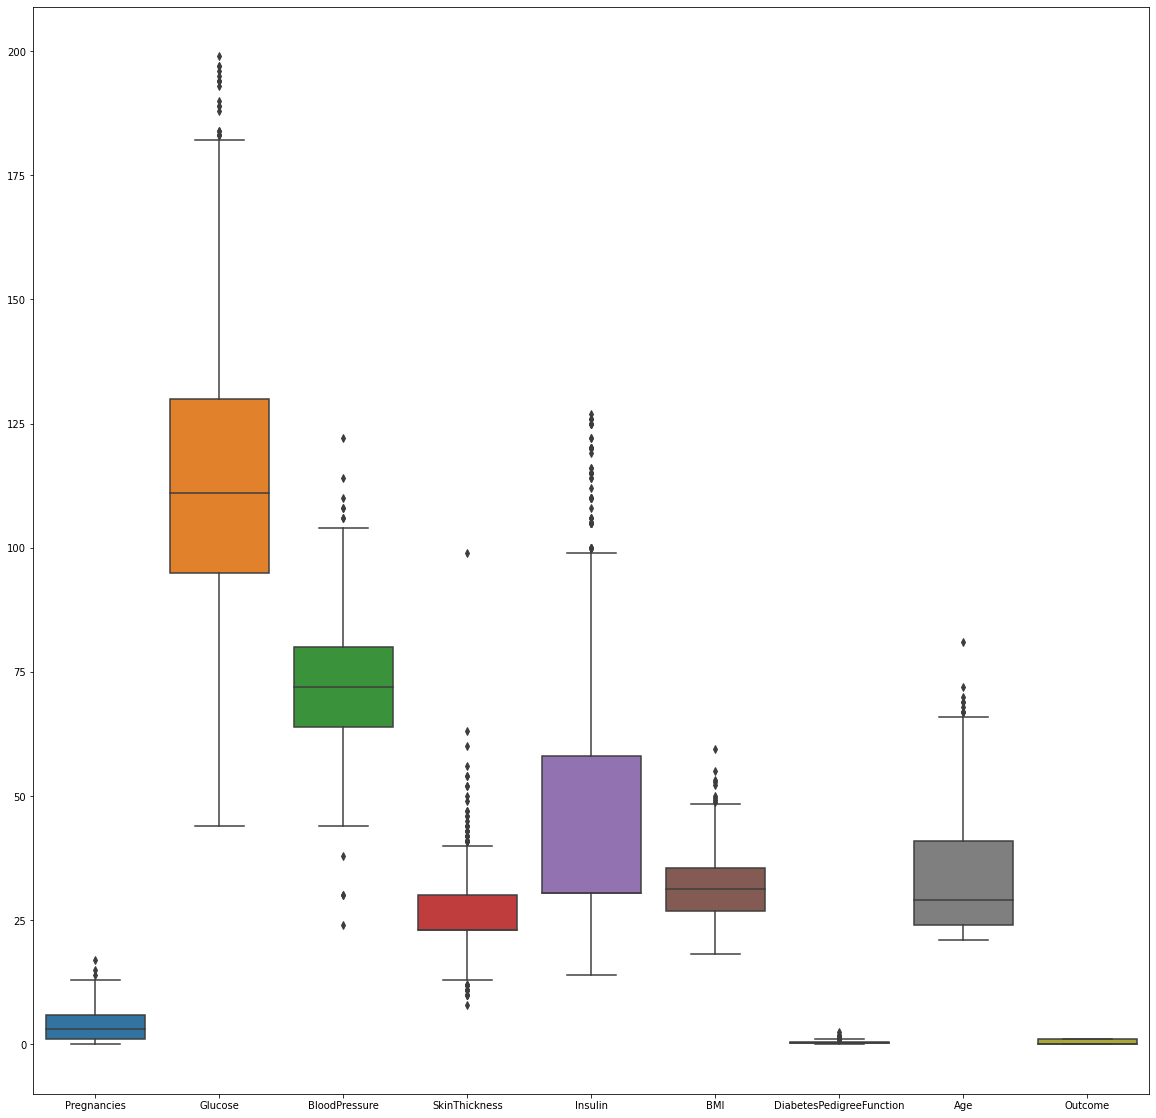

In [11]:
#Use boxplot to verify
fig , ax = plt.subplots(figsize = (20,20))
sns.boxplot(data = df_new, ax = ax)

In [12]:
#Categorization
def glucose_to_glucose_group(row):
    if 0 <= row["Glucose"] < 140:
        return "Nodiabetes"
    elif 140 <= row["Glucose"] < 199:
        return "Prediabetes"
    else:
        return "Diabetes"

def bmi_to_bmi_group(row):
    if row["BMI"] < 18.5:
        return "Underweight"
    elif row["BMI"] < 25:
        return "Normal"
    elif row["BMI"] < 30:
        return "Overweight"
    elif row["BMI"] > 30:
        return "Obese"
    else:
        return None

df["GlucoseGroup"] = df_new.apply(glucose_to_glucose_group, axis=1)
df["BMIGroup"] = df_new.apply(bmi_to_bmi_group, axis=1)
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0     30.5  33.6   
1              1     85.0           66.0           29.0     30.5  26.6   
2              8    183.0           64.0           23.0     30.5  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0     30.5  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0           23.0     30.5  30.1   
767            1     93.0           70.0           31.0     30.5  30.4   

     DiabetesPedigreeFunction  Age  Outcome GlucoseGroup    BMIGroup  
0                       0.627   50        1  Prediabetes       Obese  
1                       0.351   31        0   Nodiabetes  Overweight  
2                       0.672   32        1  Prediabetes      Normal  
3                       0.167   21        0   Nodiabetes  Overweight  
4                       2.288   33        1          NaN         NaN  
..                        ...  ...      ...          ...         ...  
763                     0.171   63        0          NaN         NaN  
764                     0.340   27        0   Nodiabetes       Obese  
765                     0.245   30        0   Nodiabetes  Overweight  
766                     0.349   47        1   Nodiabetes       Obese  
767                     0.315   23        0   Nodiabetes       Obese  

[768 rows x 11 columns]

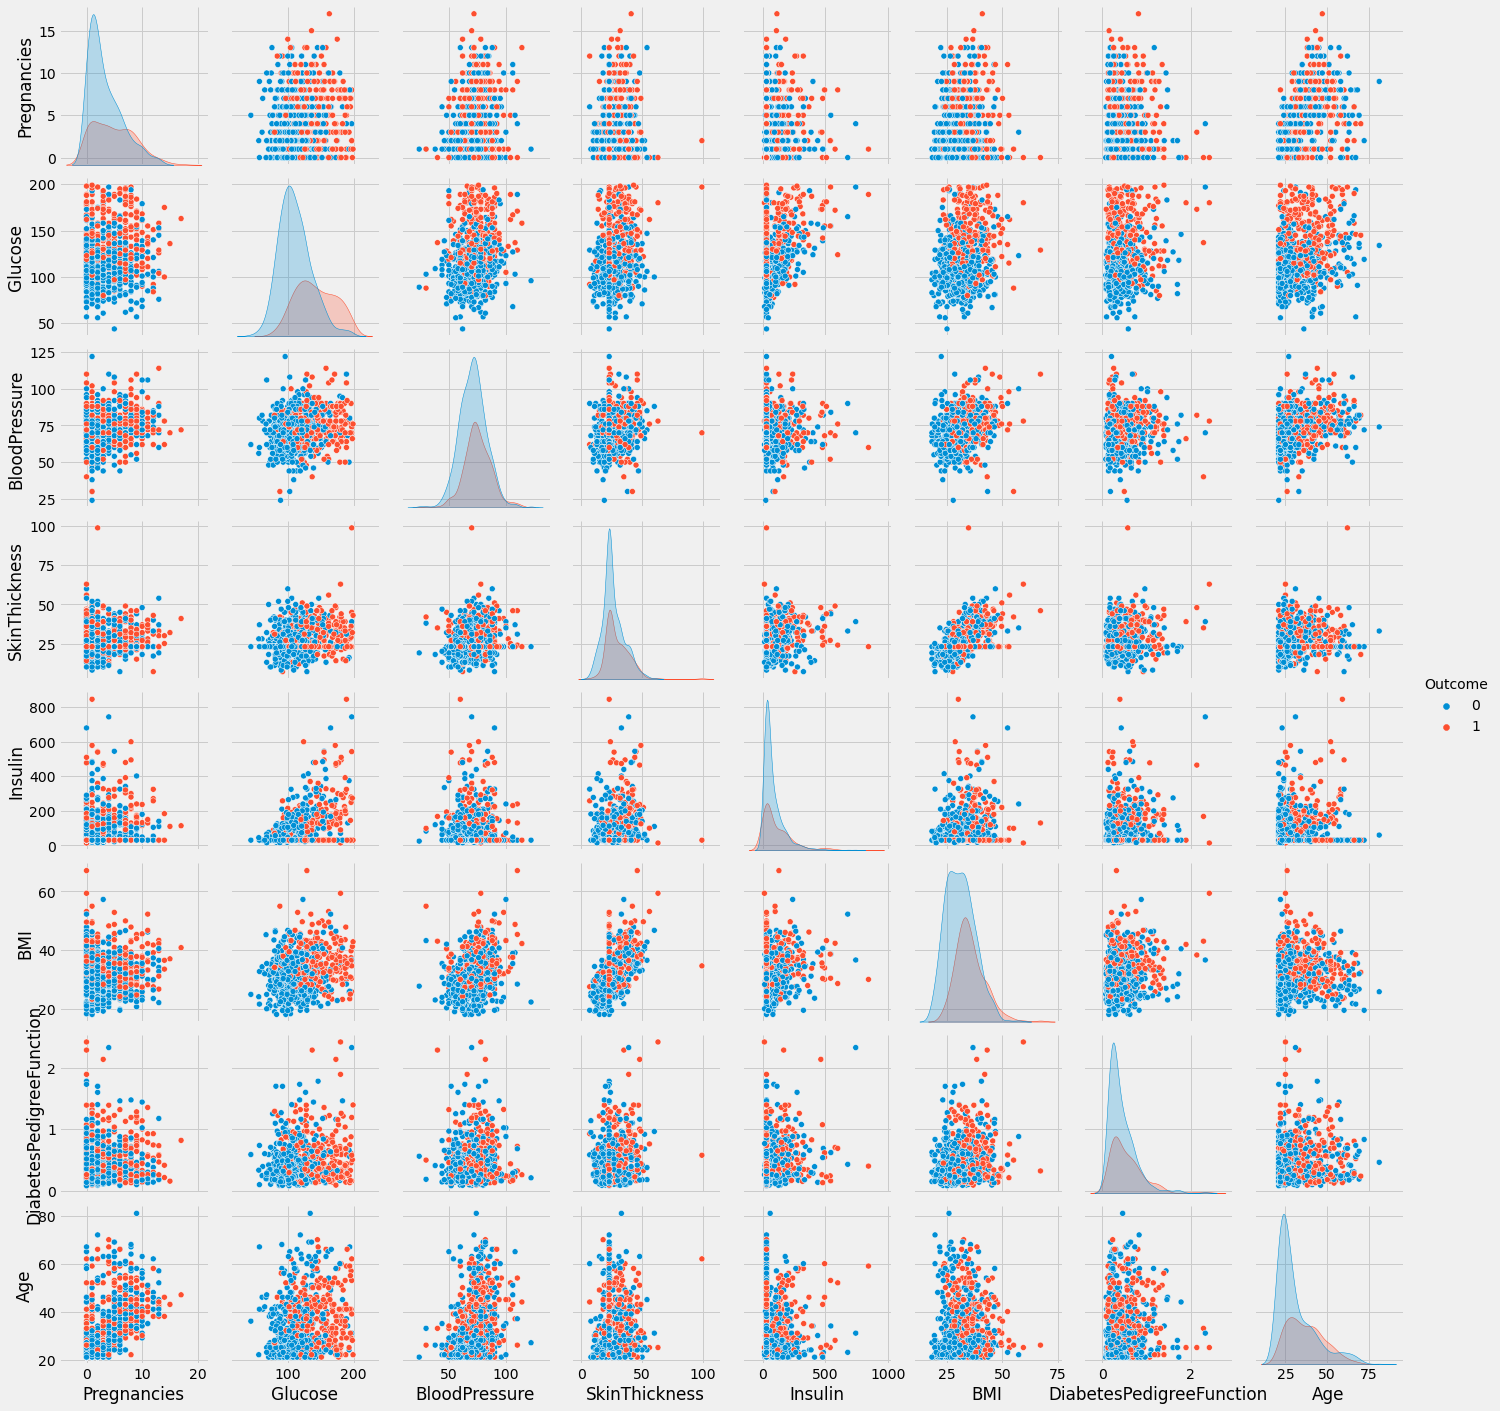

In [13]:
#Use a paired plot to make all variables correspond to each other
plt.style.use('fivethirtyeight')
sns.pairplot(df, hue = 'Outcome', vars = df.columns[:8], diag_kind = 'kde')
#The only clear trend appeared to be that higher blood sugar was associated with an outcome of 1, meaning the patient had diabetes.

In [14]:
#Correlation
df.corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.492782
BloodPressure               0.165723
SkinThickness               0.189065
Insulin                     0.148457
BMI                         0.312249
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

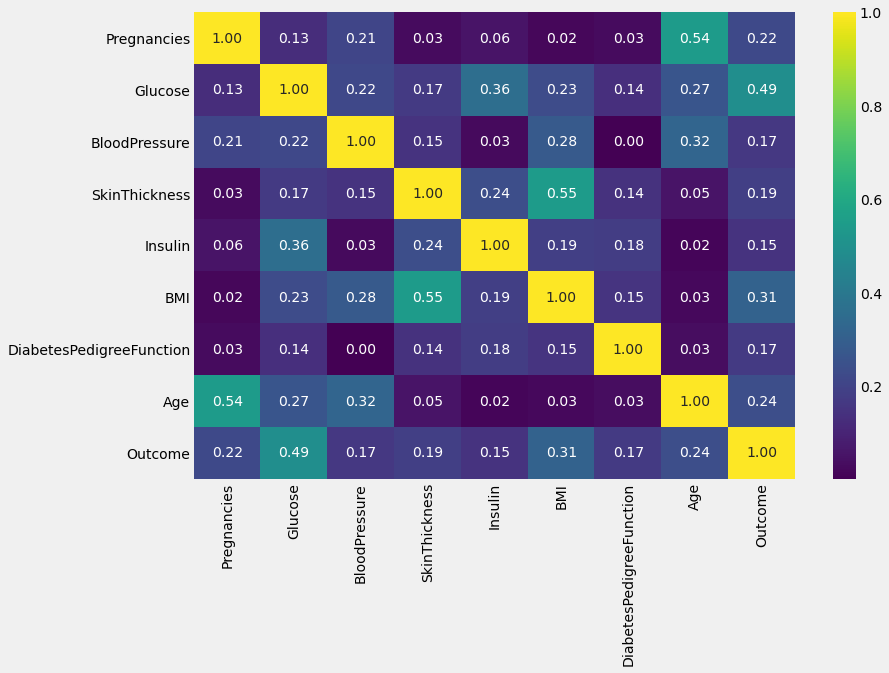

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(np.abs(df.corr()),annot=True,cmap="viridis",fmt="0.2f");

In [16]:
#Two sample t-test of BMI
sample1 = df[df.Outcome == 1].BMI
sample2 = df[df.Outcome == 0].BMI


tStat1, pVal1 = stats.ttest_ind(sample1,sample2,equal_var = False)

print("P-value: {0} T-statistics: {1}".format(pVal1, tStat1))

P-value: 2.438272743559047e-18 T-statistics: 9.057617312723613


In [17]:
##Two sample t-test of Glucose
sample1 = df[df.Outcome == 1].Glucose
sample2 = df[df.Outcome == 0].Glucose


tStat1, pVal1 = stats.ttest_ind(sample1,sample2,equal_var = False)

print("P-value: {0} T-statistics: {1}".format(pVal1, tStat1))

P-value: 3.5421485614431447e-41 T-statistics: 14.852653441079662


In [18]:
#Multiple linear regression 
model = ols('Outcome ~ Glucose + BMI + Glucose:BMI', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Outcome   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     101.4
Date:                Sun, 10 Apr 2022   Prob (F-statistic):           2.85e-55
Time:                        21:49:19   Log-Likelihood:                -391.93
No. Observations:                 768   AIC:                             791.9
Df Residuals:                     764   BIC:                             810.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.7630      0.297     -2.569      0.010      -1.346      -0.180
Glucose         0.0053      0.002      2.184      0.029       0.001       0.010
BMI             0.0082      0.009      0.914      0.361      -0.009       0.026
Glucose:BMI  5.153e-05   7.11e-05      0.724      0.469   -8.81e-05       0.000
==============================================================================
Omnibus:                       46.987   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.409
Skew:                           0.428   Prob(JB):                     2.05e-08
Kurtosis:                       2.388   Cond. No.                     8.68e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.68e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
#Power analysis
#Sample size
effect_size = 0.5
alpha = 0.05
power = 0.8

from statsmodels.stats.power import TTestIndPower
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha)
print('Sample Size required {0:.2f}'.format(sample_size))

Sample Size required 63.77


In [20]:
#Variety of effect sizes on sample size
effect_size = np.arange(0.1, 1, 0.1)
alpha = 0.05
power = 0.8

def power_analysis_func(row):
    analysis = TTestIndPower()
    return analysis.solve_power(effect_size=row["Effect Size"], power=power, alpha=alpha)

power_analysis_df = pd.DataFrame({"Effect Size": effect_size, "Alpha": alpha, "Power": power})
power_analysis_df["Sample Size"] = power_analysis_df.apply(power_analysis_func, axis=1)
power_analysis_df

Effect Size  Alpha  Power  Sample Size
0          0.1   0.05    0.8  1570.733066
1          0.2   0.05    0.8   393.405699
2          0.3   0.05    0.8   175.384672
3          0.4   0.05    0.8    99.080327
4          0.5   0.05    0.8    63.765612
5          0.6   0.05    0.8    44.585790
6          0.7   0.05    0.8    33.024570
7          0.8   0.05    0.8    25.524573
8          0.9   0.05    0.8    20.386331

In [21]:
#Variety of effect sizes on Power
effect_size = np.arange(0.1, 1, 0.1)
alpha = 0.05
sample_size = 100

def power_analysis_func(row):
    analysis = TTestIndPower()
    return analysis.solve_power(effect_size=row["Effect Size"], power=None, nobs1=sample_size, ratio=1.0, alpha=alpha)

power_analysis_df = pd.DataFrame({"Effect Size": effect_size, "Alpha": alpha, "Sample Size": sample_size})
power_analysis_df["Power"] = power_analysis_df.apply(power_analysis_func, axis=1)
power_analysis_df

Effect Size  Alpha  Sample Size     Power
0          0.1   0.05          100  0.108372
1          0.2   0.05          100  0.290646
2          0.3   0.05          100  0.560059
3          0.4   0.05          100  0.803647
4          0.5   0.05          100  0.940427
5          0.6   0.05          100  0.988152
6          0.7   0.05          100  0.998490
7          0.8   0.05          100  0.999878
8          0.9   0.05          100  1.000000

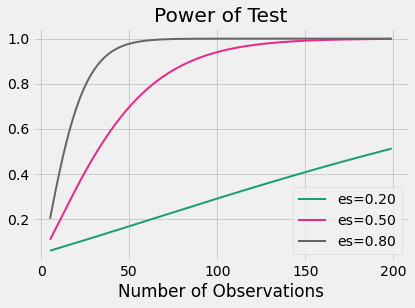

In [22]:
#Power curves for varying sample and effect size
effect_sizes = array([0.2, 0.5, 0.8])
sample_sizes = array(range(5, 200))

analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
pyplot.show()

In [23]:
#Two way ANOVA
model = ols('Outcome ~ Glucose + BMI + Glucose:BMI', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq     df           F        PR(>F)
Glucose       32.601233    1.0  199.609049  1.956585e-40
BMI            7.243296    1.0   44.348857  5.251070e-11
Glucose:BMI    0.085683    1.0    0.524617  4.691007e-01
Residual     124.780627  764.0         NaN           NaN

In [24]:
#ANCOVA
pg.ancova(data=df, dv='Outcome', between='BMI', covar='Pregnancies')

Source          SS   DF          F     p-unc       np2
0          BMI   60.771491  246   1.222073  0.031084  0.366340
1  Pregnancies    4.525531    1  22.387308  0.000003  0.041276
2     Residual  105.116532  520        NaN       NaN       NaN

In [25]:
#ANCOVA
pg.ancova(data=df, dv='Outcome', between='Glucose', covar='Pregnancies')

Source          SS   DF          F         p-unc       np2
0      Glucose   57.507760  134   2.502583  3.303837e-14  0.346666
1  Pregnancies    4.982811    1  29.056367  9.938963e-08  0.043954
2     Residual  108.380264  632        NaN           NaN       NaN